In [165]:
import numpy
import pandas
import math
import matplotlib
import seaborn
import sklearn

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.discriminant_analysis
import sklearn.neighbors

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [32]:
auto = pandas.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [33]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
med = numpy.median(auto['mpg'])
auto['mpg01'] = numpy.zeros(392)
# auto['mpg01'][auto['mpg'] > med] = 1
auto.loc[auto['mpg'] > med, 'mpg01'] = 1

auto.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amc matador,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN,0.500000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN,0.500639
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN,0.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN,1.000000


In [45]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


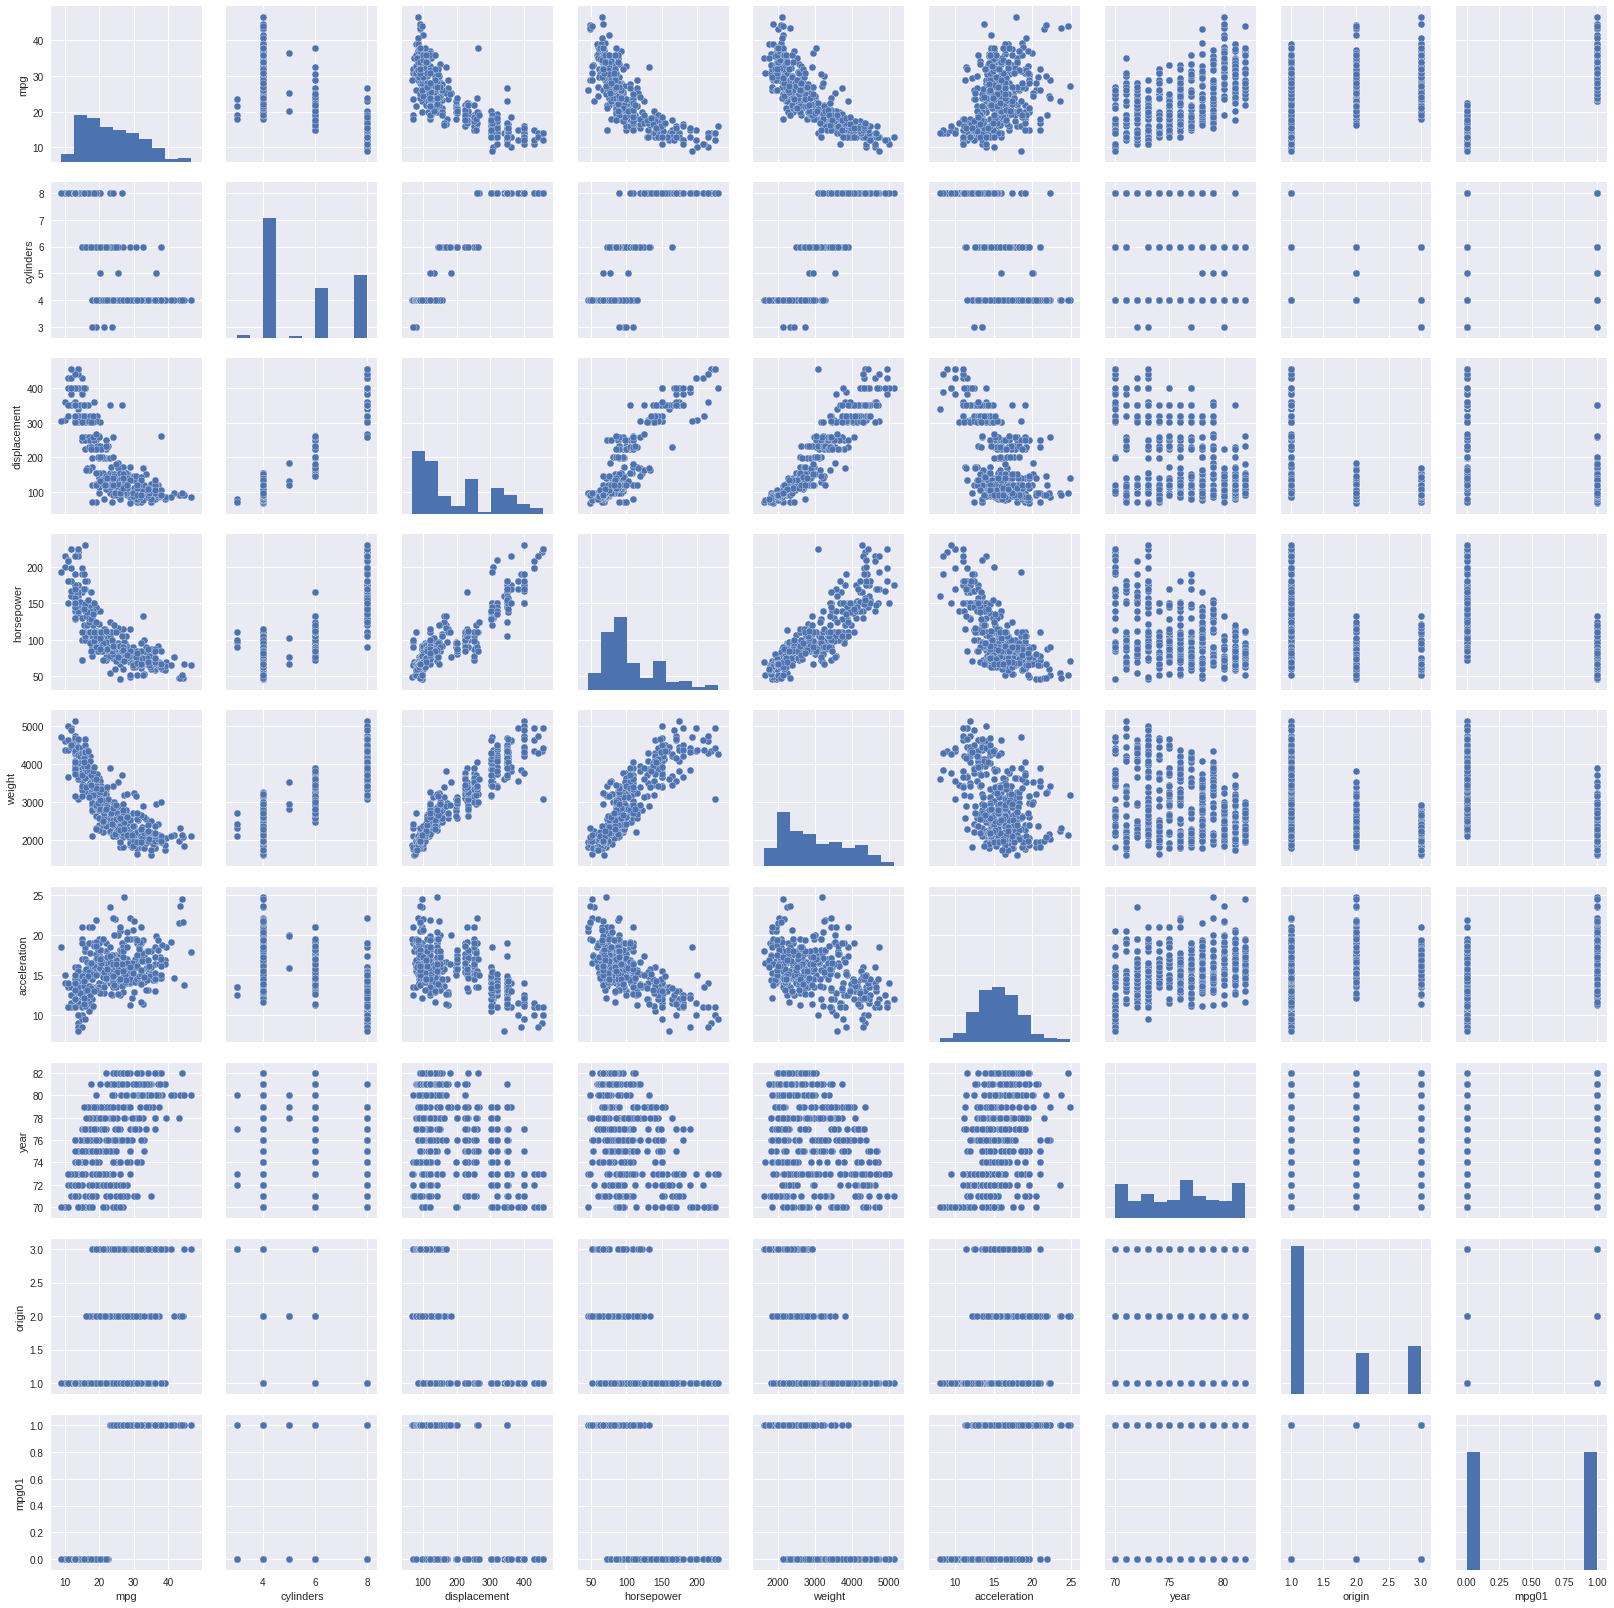

In [27]:
seaborn.pairplot(auto.iloc[:, 0:10])

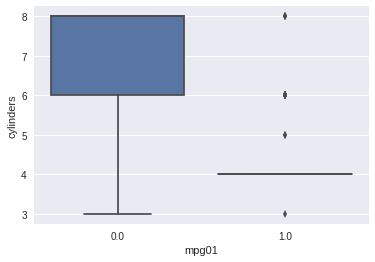

In [47]:
seaborn.boxplot(auto.iloc[:, 9], auto.iloc[:, 1])

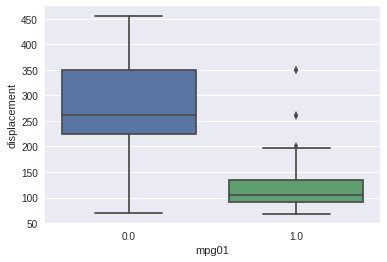

In [48]:
seaborn.boxplot(auto.iloc[:, 9], auto.iloc[:, 2])

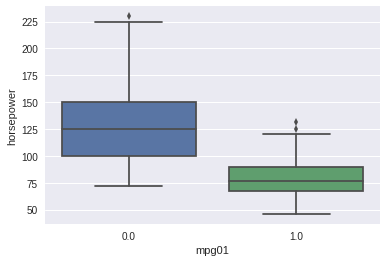

In [49]:
seaborn.boxplot(auto.iloc[:, 9], auto.iloc[:, 3])

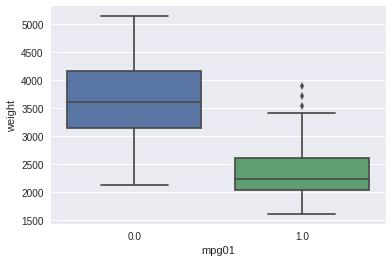

In [50]:
seaborn.boxplot(auto.iloc[:, 9], auto.iloc[:, 4])

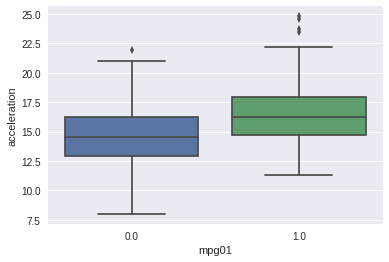

In [51]:
seaborn.boxplot(auto.iloc[:, 9], auto.iloc[:, 5])

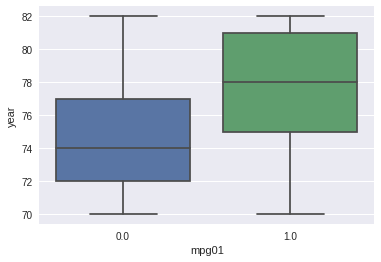

In [52]:
seaborn.boxplot(auto.iloc[:, 9], auto.iloc[:, 6])

In [ ]:
# It seems like mpg01 has a relationship with weight, cylinders, displacement, and horsepower since the boxes do not
# align for the 2 different mpg01 values.

In [56]:
auto.train, auto.test = sklearn.model_selection.train_test_split(auto, test_size = 0.3, random_state = 42)
auto.train.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,23.637591,5.496350,196.744526,104.883212,2986.485401,15.522263,76.138686,1.562044,0.521898
std,8.016188,1.716646,104.001305,38.134438,838.977833,2.857850,3.619610,0.815251,0.500434
min,9.000000,3.000000,70.000000,48.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.125000,4.000000,105.000000,76.250000,2245.250000,13.500000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,151.000000,93.500000,2818.500000,15.400000,76.000000,1.000000,1.000000
75%,29.975000,8.000000,302.000000,130.000000,3625.750000,17.375000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [115]:
auto.train['index'] = numpy.arange(0,274,1)
auto.train.set_index('index')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
index,,,,,,,,,,
0,22.0,4,108.0,94,2379,16.5,73,3,datsun 610,0.0
1,21.0,6,200.0,85,2587,16.0,70,1,ford maverick,0.0
2,37.0,4,119.0,92,2434,15.0,80,3,datsun 510 hatchback,1.0
3,21.0,6,199.0,90,2648,15.0,70,1,amc gremlin,0.0
4,15.0,6,250.0,100,3336,17.0,74,1,chevrolet nova,0.0
5,31.0,4,91.0,68,1970,17.6,82,3,mazda glc custom,1.0
6,23.0,4,115.0,95,2694,15.0,75,2,audi 100ls,1.0
7,24.5,4,151.0,88,2740,16.0,77,1,pontiac sunbird coupe,1.0
8,29.0,4,85.0,52,2035,22.2,76,1,chevrolet chevette,1.0


In [57]:
auto.test.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,23.000847,5.415254,188.995763,103.508475,2956.915254,15.585593,75.610169,1.610169,0.449153
std,7.304588,1.686174,106.369749,39.454777,876.415208,2.525131,3.818609,0.784834,0.499529
min,10.000000,3.000000,68.000000,46.000000,1760.000000,8.500000,70.000000,1.000000,0.000000
25%,17.150000,4.000000,98.000000,75.000000,2191.750000,14.200000,72.000000,1.000000,0.000000
50%,22.000000,4.000000,140.000000,93.500000,2792.500000,15.500000,75.000000,1.000000,0.000000
75%,27.875000,6.000000,256.000000,115.000000,3587.500000,16.675000,79.000000,2.000000,1.000000
max,44.000000,8.000000,455.000000,225.000000,4951.000000,24.600000,82.000000,3.000000,1.000000


In [98]:
auto.test['index'] = numpy.arange(0,118,1)
auto.test

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01,index
index,,,,,,,,,,,
0,26.0,4,96.0,69,2189,18.0,72,2,renault 12 (sw),1.0,0
1,21.6,4,121.0,115,2795,15.7,78,2,saab 99gle,0.0,1
2,36.1,4,91.0,60,1800,16.4,78,3,honda civic cvcc,1.0,2
3,26.0,4,91.0,70,1955,20.5,71,1,plymouth cricket,1.0,3
4,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1.0,4
5,28.0,4,97.0,75,2155,16.4,76,3,toyota corolla,1.0,5
6,13.0,8,400.0,170,4746,12.0,71,1,ford country squire (sw),0.0,6
7,26.0,4,97.0,75,2265,18.2,77,3,toyota corolla liftback,1.0,7
8,19.0,6,225.0,95,3264,16.0,75,1,plymouth valiant custom,0.0,8


In [119]:
predictors.train = auto.train[['cylinders','displacement','horsepower','weight']]
predictors.test = auto.test[['cylinders','displacement','horsepower','weight']]

lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components = 1)
lda.train = lda.fit(predictors.train, auto.train['mpg01'])
results1 = lda.train.transform(predictors.train)

lda.test = lda.train.predict(predictors.test)
lda.results = pandas.DataFrame(lda.test, columns = ['LDA Test'])
lda.results['True Value'] = auto.test['mpg01']
lda.results

,LDA Test,True Value
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,0.0,0.0
9,1.0,1.0


In [106]:
lda.error = lda.results[lda.results['LDA Test'] != lda.results['True Value']]
lda.error.count()

LDA Test      16
True Value    16
dtype: int64

In [111]:
lda.error.rate = 16/118
print('The error rate for the LDA model is', lda.error.rate)

The error rate for the LDA model is 0.13559322033898305


In [122]:
qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.train = qda.fit(predictors.train, auto.train['mpg01'])

qda.test = qda.train.predict(predictors.test)
qda.results = pandas.DataFrame(qda.test, columns = ['QDA Test'])
qda.results['True Value'] = auto.test['mpg01']
qda.results

,QDA Test,True Value
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,0.0,0.0
9,1.0,1.0


In [123]:
qda.error = qda.results[qda.results['QDA Test'] != qda.results['True Value']]
qda.error.count()

QDA Test      17
True Value    17
dtype: int64

In [124]:
qda.error.rate = 17/118
print('The error rate for the QDA model is', qda.error.rate)

The error rate for the QDA model is 0.1440677966101695


In [128]:
logit_train = auto.train[['cylinders','displacement','horsepower','weight', 'mpg01']]
logit_test = auto.test[['cylinders','displacement','horsepower','weight', 'mpg01']]

fit1 = smf.glm('mpg01~cylinders+displacement+horsepower+weight',data = logit_train,family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  274
Model:                            GLM   Df Residuals:                      269
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -67.059
Date:                Fri, 20 Oct 2017   Deviance:                       134.12
Time:                        20:27:49   Pearson chi2:                     441.
No. Iterations:                     7                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.8599      2.263      5.682      0.000       8.424      17.296
cylinders       -0.1745      0.448     -0.390 

In [141]:
logit_test_nompg = auto.test[['cylinders','displacement','horsepower','weight']]
# print('Predicted probability of default:',fit1.predict(new_data)[0])
logit_test['Predicted Logit Probs'] = fit1.predict(logit_test_nompg)
logit_test['Results'] = numpy.zeros(118)
logit_test['Results'][logit_test['Predicted Logit Probs'] > 0.5] = 1
logit_test

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.

,cylinders,displacement,horsepower,weight,mpg01,Predicted Logit Results,Predicted Logit Results,Predicted Logit Probs,Results
index,,,,,,,,,
0,4,96.0,69,2189,1.0,0.977825,1.0,0.977825,1.0
1,4,121.0,115,2795,0.0,0.563838,1.0,0.563838,1.0
2,4,91.0,60,1800,1.0,0.993275,1.0,0.993275,1.0
3,4,91.0,70,1955,1.0,0.985829,1.0,0.985829,1.0
4,4,140.0,86,2790,1.0,0.799717,1.0,0.799717,1.0
5,4,97.0,75,2155,1.0,0.972525,1.0,0.972525,1.0
6,8,400.0,170,4746,0.0,0.000061,0.0,0.000061,0.0
7,4,97.0,75,2265,1.0,0.966311,1.0,0.966311,1.0
8,6,225.0,95,3264,0.0,0.231037,0.0,0.231037,0.0


In [142]:
logit_error = logit_test[logit_test['Results'] != logit_test['mpg01']]
logit_error.count()

cylinders                   16
displacement                16
horsepower                  16
weight                      16
mpg01                       16
Predicted  Logit Results    16
Predicted Logit Results     16
Predicted Logit Probs       16
Results                     16
dtype: int64

In [143]:
logit_error_rate = 16/118
print('The error rate for the logistic regression model is', logit_error_rate)

The error rate for the logistic regression model is 0.13559322033898305


In [162]:
# Create the knn model.

score = numpy.array([])
k_values = numpy.array([])

for trial in range(10):
    cv_method = KFold(n_splits=10,shuffle=True,random_state = trial)
    for k in range(8):
        order = numpy.append(k_values,k+1)
        knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors = k+1)
        x = predictors.train
        y = auto.train['mpg01']
        error = numpy.mean(cross_val_score(knn,x,y, cv = cv_method))
        score = numpy.append(score,error)
        
seaborn.boxplot(x = order,y = score)
matplotlib.title('10-Fold Crossvalidation')
matplotlib.xlabel('Number of Neighbors')
matplotlib.ylabel('Test Error Rate')

AssertionError: Grouper and axis must be same length

In [3]:
print(k_values)

NameError: name 'k_values' is not defined

In [146]:
# Attempt to run knn once on training and get test error rate
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 1)
knn.fit(predictors.train, auto.train['mpg01'])
knn_predictions = knn.predict(predictors.test)
knn_predictions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.])

In [163]:
knn_results = pandas.DataFrame(knn_predictions, columns = ['KNN Test'])
knn_results['True Value'] = auto.test['mpg01']
knn_results
knn_error = knn_results[knn_results['KNN Test'] != knn_results['True Value']]
knn_error_rate = len(knn_error)/118

In [170]:
# Now to question 7
confusion_matrix(lda.results['True Value'],lda.results['LDA Test'])
# 14 false positives, 2 false negatives, and 102 correct classifications. 

array([[51, 14],
       [ 2, 51]])

In [171]:
confusion_matrix(qda.results['True Value'],qda.results['QDA Test'])
# 14 false positives, 3 false negatives, and 101 correct classifications. 

array([[51, 14],
       [ 3, 50]])

In [173]:
confusion_matrix(logit_test['mpg01'],logit_test['Results'])
# 14 false positives, 2 false negatives, and 102 correct classifications. 

array([[51, 14],
       [ 2, 51]])